In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# shared link
shared_link = 'https://drive.google.com/file/d/1niX0zU5GYSSD1PLXs24-twQPW8xslDtS/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Live.csv', 'wb') as f:
    f.write(response.content)

df=pd.read_csv('Live.csv')

print(df.head())


if df is None:
    print("Error: Could not load the data. Please check the file path or shared link.")

                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [3]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [4]:
len(df['status_id'].unique())

6997

In [5]:
len(df['status_published'].unique())

6913

In [6]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB
None


In [9]:
print(df.describe())

       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000     0.000000  
25%   

In [10]:
df.status_type.value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


In [11]:
# Let's select feature vector first # df.drop('status_type', axis=1)
X = df[['num_reactions', 'num_comments', 'num_shares','num_likes','num_loves']]

# Let's select the target variable
y = df['status_type']

print("Feature vector (X):")
print(X.head(2))

print("\nTarget variable (y):")
print(y.head(2))

Feature vector (X):
   num_reactions  num_comments  num_shares  num_likes  num_loves
0            529           512         262        432         92
1            150             0           0        150          0

Target variable (y):
0    video
1    photo
Name: status_type, dtype: object


## **Convert categorical variable into integers**

In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## **Data Normalization**

In [13]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.64610394  0.32335035  1.6868788   0.48272661  1.98326643]
 [-0.17319166 -0.25220622 -0.3041444  -0.14472021 -0.3184544 ]
 [-0.00673846  0.01308938  0.12901714 -0.02457082  0.2069384 ]
 ...
 [-0.49312768 -0.25220622 -0.3041444  -0.47624353 -0.29343569]
 [ 0.26131603 -0.23871662 -0.13695924  0.29805255 -0.26841699]
 [-0.46070173 -0.25220622 -0.3041444  -0.44064371 -0.3184544 ]]


## **Outlier Detection**

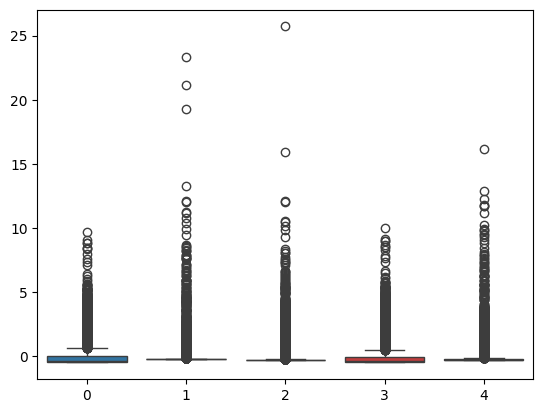

In [14]:
# Visualizing the data
sns.boxplot(data=X_scaled)
plt.show()

## **Elbow Method For Optimal k**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

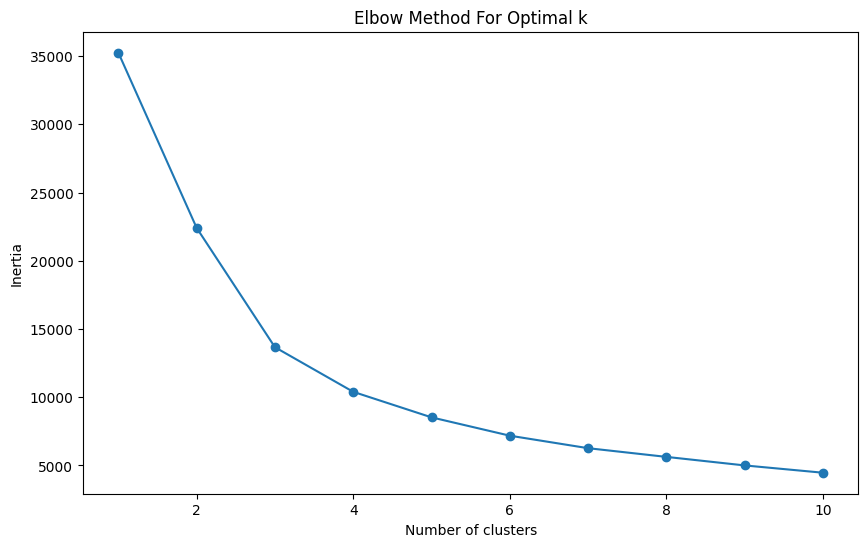

In [15]:

# List to store the sum of squared distances for each number of clusters
inertia = []

# Range of clusters to try (e.g., from 1 to 10)
range_clusters = range(1, 11)

# Calculate inertia for each number of clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## **Dimensionality Reduction**



In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
features_pca = pca.fit_transform(X_scaled)

## **Apply K-means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


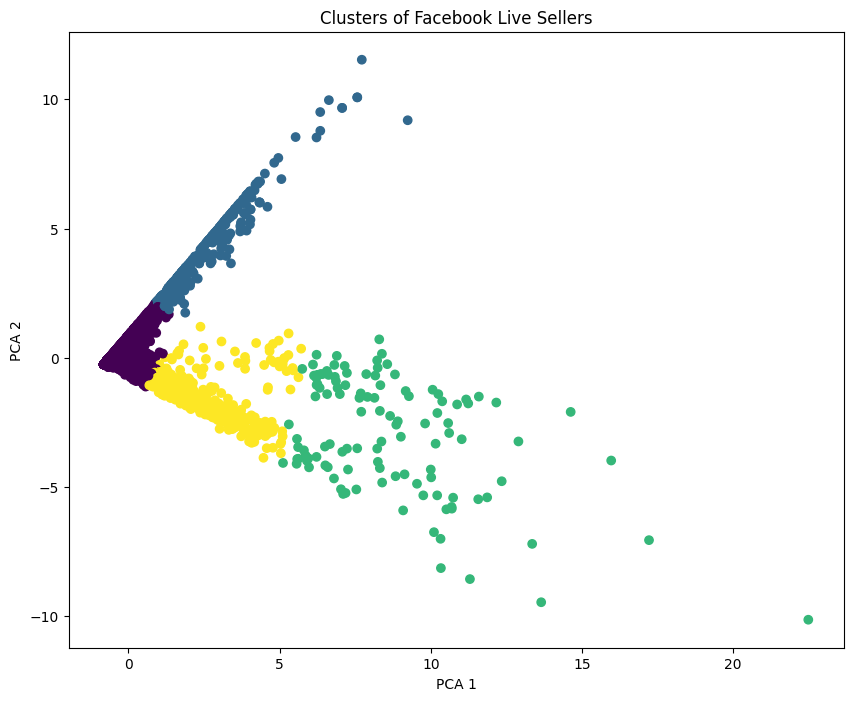

In [26]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualize the Clusters
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters of Facebook Live Sellers')
plt.show()

In [27]:

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}")

Silhouette Score for 4 clusters: 0.7581191290685824


In [28]:

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 895 out of 7050 samples were correctly labeled.
Accuracy score: 0.13
